# Introduction: Time Series Analysis Project

This dataset provides data from 1st January 1849 to 1st August 2013 in the Country's of the World. In this project we will discuss and do Climate Change Prediction using time series analysis on how the climate had changed through these years. The 2 parameters here are AverageTemperature, AverageTemperatureUncertainty.

In [114]:
# Import numpy, pandas for data manipulation
import pandas as pd 
import numpy as np
from datetime import datetime, timedelta

# Import matplotlib, seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Exploratory Data Analysis

## Read in Data and Examine

In [115]:
# Import the data
df = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv") 

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [117]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [118]:
df.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E
239176,2013-09-01,NaN,NaN,Xian,China,34.56N,108.97E


In [119]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [120]:
# Check the shape of the dataset
df.shape

(239177, 7)

In [121]:
#checking for any null values
df.isnull().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [122]:
df = df.dropna(how= 'any',axis=0)

In [123]:
df.shape

(228175, 7)

In [124]:
df.rename(columns={'dt':'Date', 'AverageTemperature':'Avg_temp', 'AverageTemperatureUncertainty':'confidence_interval_temp'}, inplace=True)
df.head()

,Date,Avg_temp,confidence_interval_temp,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [125]:
df.head(100)

,Date,Avg_temp,confidence_interval_temp,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
151,1861-08-01,23.648,1.253,Abidjan,Côte D'Ivoire,5.63N,3.23W
154,1861-11-01,25.762,1.476,Abidjan,Côte D'Ivoire,5.63N,3.23W
155,1861-12-01,25.856,1.656,Abidjan,Côte D'Ivoire,5.63N,3.23W
156,1862-01-01,25.427,1.396,Abidjan,Côte D'Ivoire,5.63N,3.23W


now we need to transform the date into a datetime object and set it as an index

In [126]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.index

DatetimeIndex(['1849-01-01', '1849-02-01', '1849-03-01', '1849-04-01',
               '1849-05-01', '1849-06-01', '1849-07-01', '1849-08-01',
               '1849-09-01', '1849-10-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=228175, freq=None)

In order to get more information, Python Pandas library provides a 'describe' function to show the count, mean, standard deviation, min/ max value and the quantiles of our dataset:

In [127]:
df.describe()

,Avg_temp,confidence_interval_temp
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [128]:
df['Year'] = df.index.year
df.head()

,Avg_temp,confidence_interval_temp,City,Country,Latitude,Longitude,Year
Date,,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849


In [129]:
df.head(100)

,Avg_temp,confidence_interval_temp,City,Country,Latitude,Longitude,Year
Date,,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
...,...,...,...,...,...,...,...
1861-08-01,23.648,1.253,Abidjan,Côte D'Ivoire,5.63N,3.23W,1861
1861-11-01,25.762,1.476,Abidjan,Côte D'Ivoire,5.63N,3.23W,1861
1861-12-01,25.856,1.656,Abidjan,Côte D'Ivoire,5.63N,3.23W,1861


In [130]:
df.describe()

,Avg_temp,confidence_interval_temp,Year
count,228175.000000,228175.000000,228175.000000
mean,18.125969,0.969343,1913.893209
std,10.024800,0.979644,62.025981
min,-26.772000,0.040000,1743.000000
25%,12.710000,0.340000,1869.000000
50%,20.428000,0.592000,1918.000000
75%,25.918000,1.320000,1966.000000
max,38.283000,14.037000,2013.000000


<AxesSubplot:xlabel='Date'>

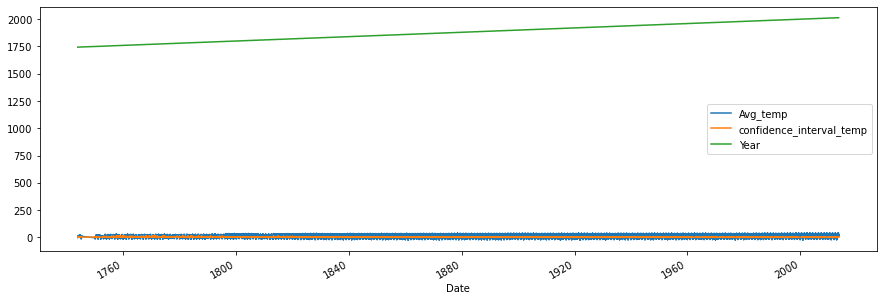

In [131]:
df.plot(figsize=(15,5))

as we can see,our data seems to be stationary, is shows kinda of a constant mean and variance. we can also witness the seasonality throught out the year with the temprature being at its lowest at the begging and end of each year, and at its highest in the middle of the year.

In [132]:
# Select the subset data from 2005 to 2010
latest_df = df.loc['2005':'2010']
# Inspect first 5 rows of the data
latest_df.head(100)

,Avg_temp,confidence_interval_temp,City,Country,Latitude,Longitude,Year
Date,,,,,,,
2005-01-01,26.715,0.426,Abidjan,Côte D'Ivoire,5.63N,3.23W,2005
2005-02-01,29.405,0.360,Abidjan,Côte D'Ivoire,5.63N,3.23W,2005
2005-03-01,29.246,0.268,Abidjan,Côte D'Ivoire,5.63N,3.23W,2005
2005-04-01,28.508,0.170,Abidjan,Côte D'Ivoire,5.63N,3.23W,2005
2005-05-01,27.416,0.287,Abidjan,Côte D'Ivoire,5.63N,3.23W,2005
...,...,...,...,...,...,...,...
2006-12-01,17.285,0.938,Addis Abeba,Ethiopia,8.84N,38.11E,2006
2007-01-01,18.484,0.347,Addis Abeba,Ethiopia,8.84N,38.11E,2007
2007-02-01,18.959,0.520,Addis Abeba,Ethiopia,8.84N,38.11E,2007


For simplicity, the latest_df column above shows the average temperatures for the first 5 months of 2005 and last 5 months of 2007 according to the dataset.

In [133]:
latest_df[['Country','Avg_temp']].groupby(['Country']).mean().sort_values('Avg_temp')

,Avg_temp
Country,
Russia,5.667229
Chile,6.329431
Canada,6.577139
Ukraine,8.791819
Germany,10.112444
United Kingdom,10.473014
France,11.374069
South Korea,11.753514
Spain,12.348403


In [134]:
resample_df = latest_df[['Avg_temp']].resample('A').mean()

In [135]:
resample_df.head()

,Avg_temp
Date,
2005-12-31,19.607239
2006-12-31,19.793993
2007-12-31,19.854270
2008-12-31,19.608778
2009-12-31,19.833752


## Data Visualization 

Let’s explore this time series as a data visualization:

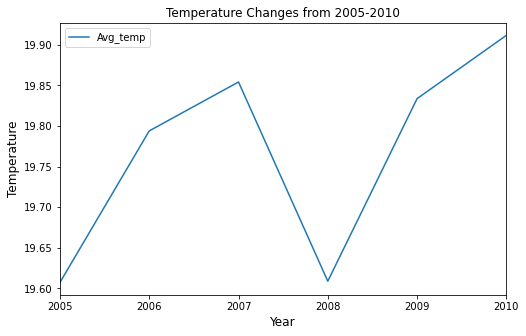

In [136]:
resample_df.plot(title='Temperature Changes from 2005-2010',figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()

In [137]:
from statsmodels.tsa.stattools import adfuller

print('Dickey Fuller Test Results:')
test_df = adfuller(resample_df.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(test_df[0:4], index=['Test Statistic','p-value','Lags Used','Numberr of Observations Used'])
for key, value in test_df[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

Dickey Fuller Test Results:
Test Statistic                 -4.115335
p-value                         0.000914
Lags Used                       1.000000
Numberr of Observations Used    4.000000
Critical Value (1%)            -7.355441
Critical Value (5%)            -4.474365
Critical Value (10%)           -3.126933
dtype: float64


In [138]:
decomp = seasonal_decompose(resample_df,freq=3)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

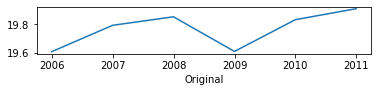

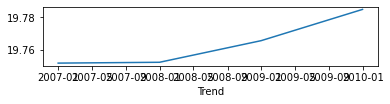

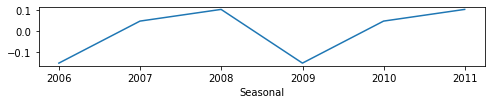

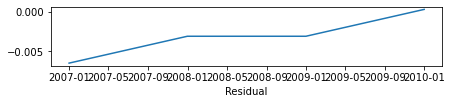

<Figure size 648x360 with 0 Axes>

In [139]:
#Plotting the Original Time Series
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

#Plotting the Trend Component
plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')
plt.figure(figsize=(8,5))

#Plotting the Seasonal Component
plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(7,5))

#Plotting the Residual Component
plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')
plt.figure(figsize=(9,5))

plt.tight_layout()

from decomposing our data, we can see that we have a strong seasonality and no trend at all since our data is stationary and has a constant mean.

we can witness the residuals clearly here from our decomposition.

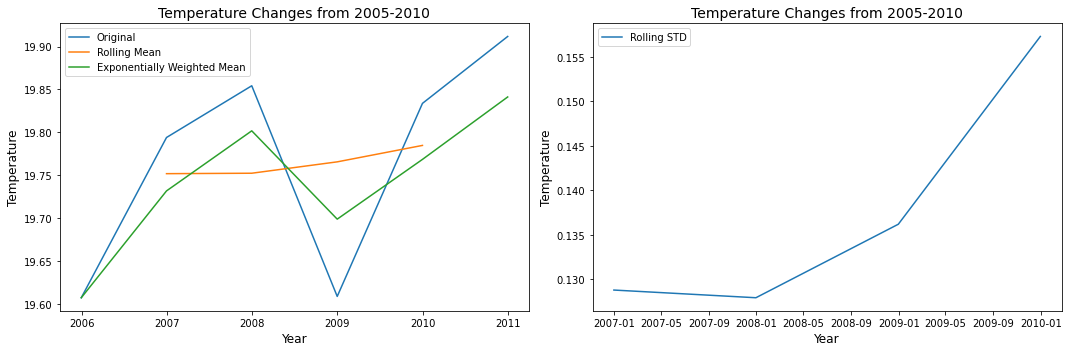

In [140]:
rol_mean = resample_df.rolling(window=3, center=True).mean()

#Exponentially Weighted Mean
ewm = resample_df.ewm(span=3).mean()

#Rolling Standard Deviation
rol_std = resample_df.rolling(window=3, center =True).std()

#Creating Subplots next to each other
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

#Temperature graph with Rolling Mean and Exponentially Weighted Mean 
ax1.plot(resample_df,label='Original')
ax1.plot(rol_mean,label='Rolling Mean')
ax1.plot(ewm, label='Exponentially Weighted Mean')
ax1.set_title('Temperature Changes from 2005-2010',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

#Temperature graph with Rolling STD
ax2.plot(rol_std,label='Rolling STD')
ax2.set_title('Temperature Changes from 2005-2010',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

In [141]:
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)

print ('Dickey-Fuller Test for the Rolling Mean:')
df_test = adfuller(rol_mean.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(df_test[0:4],index=['Test Statistics','p-value','Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)
print('')
print('Dickey-Fuller Test for the Exponentially Weighted Mean:')
df_test = adfuller(ewm.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

Dickey-Fuller Test for the Rolling Mean:
Test Statistics                 1.188664
p-value                         0.995907
Lags Used                       0.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64

Dickey-Fuller Test for the Exponentially Weighted Mean:
Test Statistic                -2.081641
p-value                        0.251961
Lags Used                      0.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


In [142]:
diff_rol_mean = resample_df = rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,Avg_temp
Date,
2006-12-31,19.751834
2007-12-31,19.752347
2008-12-31,19.765600
2009-12-31,19.784755


In [143]:
diff_ewm = resample_df - ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

,Avg_temp
Date,
2006-12-31,0.020092
2007-12-31,-0.049411
2008-12-31,0.066765
2009-12-31,0.016285


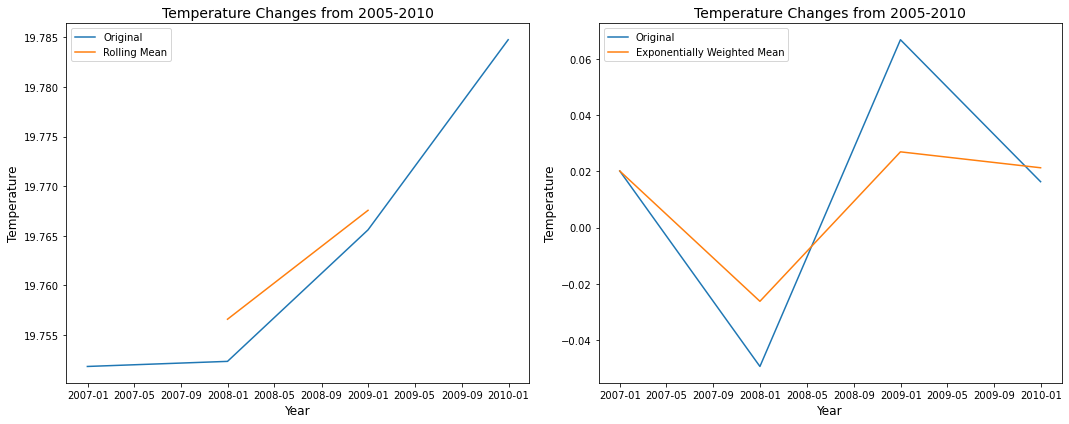

In [144]:
df_rol_mean_diff = diff_rol_mean.rolling(window=3, center=True).mean()

#Exponentially Weighted Mean of the difference
df_ewm_diff = diff_ewm.ewm(span=3).mean()

#Creating Subplots next to each other
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

#Difference graph with the Rolling Mean
ax1.plot(diff_rol_mean,label='Original')
ax1.plot(df_rol_mean_diff,label='Rolling Mean')
ax1.set_title('Temperature Changes from 2005-2010',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

#Difference graph with Exponentially Weighted Mean
ax2.plot(diff_ewm, label='Original')
ax2.plot(df_ewm_diff,label='Exponentially Weighted Mean')
ax2.set_title('Temperature Changes from 2005-2010',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()

In [145]:
print ('Dickey-Fuller Test for the Difference between the Original and Rolling Mean:')
dftest = adfuller(diff_rol_mean.iloc[:,0].values, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistc','p-value','Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)
print('')
print('Dickey-Fuller Test for the Difference between the Original and Exponentially Weighted Mean:')
dftest = adfuller(diff_ewm.iloc[:,0].values, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-values','Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test for the Difference between the Original and Rolling Mean:
Test Statistc                   1.188664
p-value                         0.995907
Lags Used                       0.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64

Dickey-Fuller Test for the Difference between the Original and Exponentially Weighted Mean:
Test Statistic                 -1.813773
p-values                        0.373645
Lags Used                       0.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


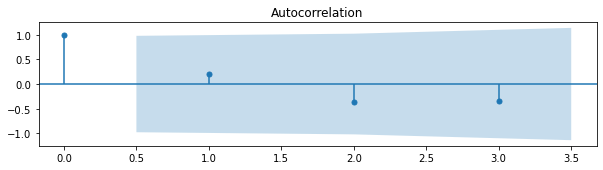

In [146]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

#plot the Autocorrelation graph
pyplot.figure(figsize=(10,5))
pyplot.subplot(211)
plot_acf(resample_df, ax=pyplot.gca())
pyplot.show()

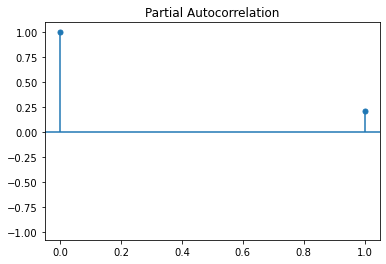

<Figure size 576x288 with 0 Axes>

In [147]:
# Plot the Partial Autocorrelation graph
import statsmodels.api as sm

sm.graphics.tsa.plot_pacf(resample_df.values.squeeze(), lags=1, method="ywm")
plt.figure(figsize=(8,4))
plt.show()